<a href="https://colab.research.google.com/github/gabrielwithappy/dacon_aisr/blob/master/huggingface_chap2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WikiDocs : 
- https://wikidocs.net/166795

| test | test|
|------|------|
| s    |   1|

In [282]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [283]:
import subprocess
import sys
import os
from pathlib import Path

ROOT = Path('/content/drive/MyDrive/20.Projects/huggingface/')
%cd '/content/drive/MyDrive/20.Projects/huggingface/'

/content/drive/MyDrive/20.Projects/huggingface


In [284]:
import subprocess

%cd '/content/drive/MyDrive/20.Projects/huggingface/'
cmd = ['python', '-m', 'pip', 'install']
libs = ["transformers", "datasets"]

cmd += libs
process_install = subprocess.run(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
print(f'execute {cmd}')
if process_install.stdout:
  print(process_install.stdout)
else:
  print(process_install.stderr)

/content/drive/MyDrive/20.Projects/huggingface
execute ['python', '-m', 'pip', 'install', 'transformers', 'datasets']
b'Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/\nRequirement already satisfied: transformers in /usr/local/lib/python3.8/dist-packages (4.26.0)\nRequirement already satisfied: datasets in /usr/local/lib/python3.8/dist-packages (2.8.0)\nRequirement already satisfied: huggingface-hub<1.0,>=0.11.0 in /usr/local/lib/python3.8/dist-packages (from transformers) (0.12.0)\nRequirement already satisfied: tokenizers!=0.11.3,<0.14,>=0.11.1 in /usr/local/lib/python3.8/dist-packages (from transformers) (0.13.2)\nRequirement already satisfied: numpy>=1.17 in /usr/local/lib/python3.8/dist-packages (from transformers) (1.21.6)\nRequirement already satisfied: regex!=2019.12.17 in /usr/local/lib/python3.8/dist-packages (from transformers) (2022.6.2)\nRequirement already satisfied: requests in /usr/local/lib/python3.8/dist-packages (fro

## Huggingface Dataset

In [285]:
from datasets import list_datasets
print(f'all datasets {len(list_datasets())}')

all datasets 19507


In [286]:
from datasets import load_dataset
emotions = load_dataset("SetFit/emotion")

  0%|          | 0/3 [00:00<?, ?it/s]

In [287]:
from datasets import ClassLabel

emotions['train'].features['label'] = ClassLabel(
    num_classes=6, 
    names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])

In [288]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 16000
    })
    test: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 2000
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 2000
    })
})

In [289]:
print(load_dataset("emotion")['train'].column_names)

  0%|          | 0/3 [00:00<?, ?it/s]

['text', 'label']


In [290]:
train_dataset = emotions['train']
display(emotions['train']['text'][0])
display(emotions['train']['label'][0])



'i didnt feel humiliated'

0

In [291]:
# https://github.com/huggingface/datasets/blob/main/src/datasets/load.py
from datasets import load_dataset
import re

class MyDataSet:
  def __init__(self, features):
    self._dict = {
        features[0] : ['a', 'b'],
        features[1] : ['1', '0']}

  def __getitem__(self, key):
    return self._dict[key]

  def __repr__(self):
      repr = "\n".join([f"        {k}: {v}" for k, v in self._dict.items()])
      return f"DatasetDict({{\n{repr}\n}})"
  

class MyDatasetDict:
  def __init__(self):
    self._dict = {'train' : MyDataSet(['text', 'label']),
                  'validation' : MyDataSet(['text', 'label'])}

  def __getitem__(self, key):
    return self._dict[key]

  def __repr__(self):
      repr = "\n".join([f"    {k}:{v}" for k, v in self._dict.items()])
      return f"DatasetDict({{\n{repr}\n}})"


# =======================================================
test = MyDatasetDict()
display(test['train'])
display(test['train']['text'][0])



DatasetDict({
        text: ['a', 'b']
        label: ['1', '0']
})

'a'

In [292]:
import pandas as pd

emotions.set_format(type="pandas")
df = emotions['train'][:]
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        16000 non-null  object
 1   label       16000 non-null  int64 
 2   label_text  16000 non-null  object
dtypes: int64(1), object(2)
memory usage: 375.1+ KB


In [293]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_text,label_name
0,i didnt feel humiliated,0,sadness,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger,anger
3,i am ever feeling nostalgic about the fireplac...,2,love,love
4,i am feeling grouchy,3,anger,anger


In [294]:
df['label'].unique()

array([0, 3, 2, 5, 4, 1])

In [295]:
import numpy as np

for label in np.sort(df['label'].unique()):
  str_label = emotions['train'].features['label'].int2str(int(label))
  print(f"{label} : {str_label}")

0 : sadness
1 : joy
2 : love
3 : anger
4 : fear
5 : surprise


In [296]:
trans_map = {
    0 : 'sadness',
    1 : 'joy',
    2 : 'love',
    3 : 'anger',
    4 : 'fear',
    5 : 'surprise'
}
df['label_name_map'] = df['label'].map(trans_map)
df['label_name'] = df['label'].apply(lambda x : emotions['train'].features['label'].int2str(x))
df.head()

,text,label,label_text,label_name,label_name_map
0,i didnt feel humiliated,0,sadness,sadness,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness,sadness,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger,anger,anger
3,i am ever feeling nostalgic about the fireplac...,2,love,love,love
4,i am feeling grouchy,3,anger,anger,anger


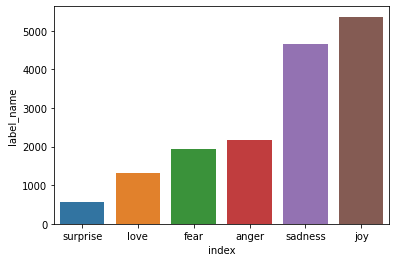

In [297]:
import matplotlib.pyplot as plt
import seaborn as sns

result = df['label_name'].value_counts(ascending=True).reset_index()
result
sns.barplot(data=result, x='index', y='label_name')

,text,label,label_text,label_name,label_name_map,Words Per Tweet
0,i didnt feel humiliated,0,sadness,sadness,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,sadness,sadness,21


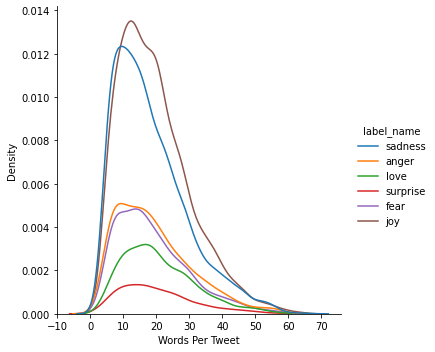

In [298]:
df['Words Per Tweet'] = df['text'].str.split().apply(len)
display(df.head(2))
sns.displot(df[['label_name', 'Words Per Tweet']], x='Words Per Tweet', hue='label_name', kind='kde')

In [299]:
text = "Tockenizing text is a core task of NLP."
tockenized_text = list(text)
print(tockenized_text)

['T', 'o', 'c', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [300]:
token2idx = {ch : idx for idx, ch in enumerate(sorted(set(tockenized_text)))}
token2idx

{' ': 0,
 '.': 1,
 'L': 2,
 'N': 3,
 'P': 4,
 'T': 5,
 'a': 6,
 'c': 7,
 'e': 8,
 'f': 9,
 'g': 10,
 'i': 11,
 'k': 12,
 'n': 13,
 'o': 14,
 'r': 15,
 's': 16,
 't': 17,
 'x': 18,
 'z': 19}

In [301]:
input_ids = [token2idx[tocken] for tocken in tockenized_text]
print(tockenized_text)
print(input_ids)
print(len(input_ids))

['T', 'o', 'c', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']
[5, 14, 7, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]
39


In [302]:
categorical_df = pd.DataFrame(
    {'Name' : ['seoul', 'busan', 'suwon'],
     'Label' : [0,1,2]}
)
categorical_df

,Name,Label
0,seoul,0
1,busan,1
2,suwon,2


In [303]:
pd.get_dummies(categorical_df['Name'])

,busan,seoul,suwon
0,0,1,0
1,1,0,0
2,0,0,1


In [304]:
import torch
import torch.nn.functional as F
input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape
print(one_hot_encodings)

tensor([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0,

In [305]:
idx = 15
print(f"token : {tockenized_text[idx]}")
print(f"token : {input_ids[idx]}")
print(f"token : {one_hot_encodings[idx]}")
print(f"get_dummies : {pd.get_dummies(tockenized_text).iloc[idx]}")

token : t
token : 17
token : tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])
get_dummies :      0
.    0
L    0
N    0
P    0
T    0
a    0
c    0
e    0
f    0
g    0
i    0
k    0
n    0
o    0
r    0
s    0
t    1
x    0
z    0
Name: 15, dtype: uint8


In [306]:
tockenized_text = text.split()
print(tockenized_text)

['Tockenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


## Subword tockenization


In [307]:
from transformers import AutoTokenizer

model_ckpt = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [308]:
from transformers import DistilBertTokenizer

distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [309]:
import torch
import torch.nn.functional as F


text = "Tockenizing text is a core task of NLP."
print(f'Text : {text}')
print("=============================")
print("")
#####################################

tockenized_text = list(text)
# set 중복제거 > sort > dict
token2idx = {ch : idx for idx, ch in enumerate(sorted(set(tockenized_text)))}
print(f'Token to IDX {token2idx}')
input_ids = [token2idx[tocken] for tocken in tockenized_text]
# one-hot encoding
input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
print(f'input_ids {input_ids}')
print(f'one-hot-encoding : {tockenized_text[0]} -> {input_ids[0]} -> {one_hot_encodings[0]}')
print(f'one-hot-encoding.shape : {one_hot_encodings.shape}')
print(f'len(input_ids) : {len(input_ids)}')

print("--------------")
encoded_text = tokenizer(text)
print(f'encoded_text : {encoded_text}')
print(f'input_ids : {encoded_text.input_ids}')
print(f'len(input_ids) : {len(encoded_text.input_ids)}')

print("")
print("Subword tokenization : 39 --> 14")

Text : Tockenizing text is a core task of NLP.

Token to IDX {' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}
input_ids tensor([ 5, 14,  7, 12,  8, 13, 11, 19, 11, 13, 10,  0, 17,  8, 18, 17,  0, 11,
        16,  0,  6,  0,  7, 14, 15,  8,  0, 17,  6, 16, 12,  0, 14,  9,  0,  3,
         2,  4,  1])
one-hot-encoding : T -> 5 -> tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
one-hot-encoding.shape : torch.Size([39, 20])
len(input_ids) : 39
--------------
encoded_text : {'input_ids': [101, 2000, 19766, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
input_ids : [101, 2000, 19766, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102]
len(input_ids) : 14

Subword tokenization : 39 --> 14


In [310]:
model_ckpt = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

text = "Tockenizing text is a core task of NLP."
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 2000, 19766, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [311]:
tokens = tokenizer.convert_ids_to_tokens([101, 2000, 19766, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102])
print(tokens)
print(len(tokens))
print(tokenizer.convert_tokens_to_string(tokens))

['[CLS]', 'to', '##cken', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']
14
[CLS] tockenizing text is a core task of nlp. [SEP]


In [312]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tockenizing text is a core task of nlp. [SEP]


In [313]:
print(tokenizer.vocab_size)
print(tokenizer.model_max_length)

30522
512


## 전체 데이터셋 토큰화하기

In [314]:
def tokenize(batch):
  print(type(batch['text'][1]))
  return tokenizer(batch["text"], padding=True, truncation=True)

In [315]:
emotions.set_format(type = 'pandas')
df = emotions['train'][:].astype('string')
df = emotions["train"][:2].astype('string')
display(df)
# print(emotions["train"][:2])


,text,label,label_text
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness


In [316]:
emotions.reset_format()

In [317]:
tokens2ids = list(zip(tokenizer.all_special_tokens, tokenizer.all_special_ids))
data = sorted(tokens2ids, key=lambda x : x[-1])
df = pd.DataFrame(data, columns=["Special Token", "Special Token ID"])
df.T

,0,1,2,3,4
Special Token,[PAD],[UNK],[CLS],[SEP],[MASK]
Special Token ID,0,100,101,102,103


In [318]:
display(emotions)
display(emotions['train']['text'][0])

model_ckpt = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
emotions_encoded = emotions.map(tokenize, batched=True, batch_size = None)
display(emotions_encoded)
display(emotions_encoded['train'])

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 16000
    })
    test: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 2000
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 2000
    })
})

'i didnt feel humiliated'

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    test: Dataset({
        features: ['text', 'label', 'label_text', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

Dataset({
    features: ['text', 'label', 'label_text', 'input_ids', 'attention_mask'],
    num_rows: 16000
})

In [319]:
emotions_encoded['train'].column_names

['text', 'label', 'label_text', 'input_ids', 'attention_mask']

In [320]:
from transformers import AutoModel

model_ckpt = 'distilbert-base-uncased'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model = AutoModel.from_pretrained(model_ckpt).to(device)

cuda


In [321]:
text = "this is a test"
inputs = tokenizer(text, return_tensors='pt')
print(f"input tensor size : {inputs['input_ids'].size()}")
print(inputs)
print(f"{tokenizer.convert_ids_to_tokens([ 101, 2023, 2003, 1037, 3231, 102])}")

input tensor size : torch.Size([1, 6])
{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}
['[CLS]', 'this', 'is', 'a', 'test', '[SEP]']


In [322]:
# .to(device)
# https://pytorch.org/docs/stable/generated/torch.Tensor.to.html
inputs = {k: v.to(device) for k,v in inputs.items()}
display(inputs)
with torch.no_grad():
  outputs = model(**inputs)
print(outputs)

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]], device='cuda:0'),
 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]], device='cuda:0')}

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [323]:
display(outputs.last_hidden_state.size())
display(outputs.last_hidden_state[:,0].size())


torch.Size([1, 6, 768])

torch.Size([1, 768])

In [324]:
def extract_hidden_states(batch):
    # 모델 입력을 GPU로 옮깁니다.
    inputs = {k:v.to(device) for k,v in batch.items() 
              if k in tokenizer.model_input_names}
    # 마지막 은닉 상태를 추출합니다.
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # [CLS] 토큰에 대한 벡터를 반환합니다.
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [325]:
emotions_encoded.set_format("torch", 
                            columns=["input_ids", "attention_mask", "label"])

In [326]:
import pickle

emotions_encoded_pickle = ROOT/'emotions_encoded.pickle'
emotions_hidden_pickle = ROOT/'emotions_hidden.pickle'
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

# if not emotions_encoded_pickle.exists():
#   emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)
#   with open( ROOT/'emotions_encoded.pickle', 'wb') as f:
#     pickle.dump(emotions_encoded, f , pickle.HIGHEST_PROTOCOL)
#   with open( ROOT/'emotions_hidden.pickle', 'wb') as f:
#     pickle.dump(emotions_hidden, f , pickle.HIGHEST_PROTOCOL)





In [327]:
# import pickle
# if emotions_encoded_pickle.exists():
#   with open( ROOT/'emotions_encoded.pickle', 'rb') as f:
#     emotions_encoded = pickle.load(f)
#   with open( ROOT/'emotions_hidden.pickle', 'rb') as f:
#     emotions_hidden = pickle.load(f)
emotions_hidden

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 16000
    })
    test: Dataset({
        features: ['text', 'label', 'label_text', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
})

In [328]:
import numpy as np
X_train = np.array(emotions_hidden['train']['hidden_state'])
X_valid = np.array(emotions_hidden['validation']['hidden_state'])
y_train = np.array(emotions_hidden['train']['label'])
y_valid = np.array(emotions_hidden['validation']['label'])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [329]:
!pip install umap-learn
# import umap as UMAP
import umap.umap_ as UMAP
from sklearn.preprocessing import MinMaxScaler

# 특성 스케일을 [0,1] 범위로 조정합니다.
X_scaled = MinMaxScaler().fit_transform(X_train)
# UMAP 객체를 생성하고 훈련시킵니다.
mapper = UMAP.UMAP(n_components=2, metric="cosine").fit(X_scaled)
# 2D 임베딩의 데이터프레임을 만듭니다.
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,X,Y,label
0,4.287703,6.822026,0
1,-2.896233,6.603032,0
2,5.153241,3.271480,3
3,-2.332540,4.474219,2
4,-3.259590,4.505714,3


In [330]:
df_emb.shape

(16000, 3)

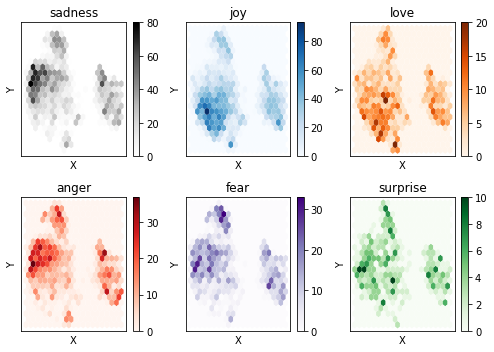

In [331]:
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    df_emb_sub.plot.hexbin(x= "X", y="Y", cmap=cmap,
                   gridsize=20, linewidths=(0,), ax=axes[i])
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])
# df_emb.plot.hexbin(x="X", y="Y", gridsize=20, linewidths=(0,))
plt.tight_layout()
plt.show()

In [332]:
# from sklearn.linear_model import LogisticRegression

# lr_clf = LogisticRegression(max_iter=3000)
# lr_clf.fit(X_train, y_train)

In [333]:
# from sklearn.dummy import DummyClassifier

# dummy_clf = DummyClassifier(strategy="most_frequent")
# dummy_clf.fit(X_train, y_train)
# dummy_clf.score(X_valid, y_valid)

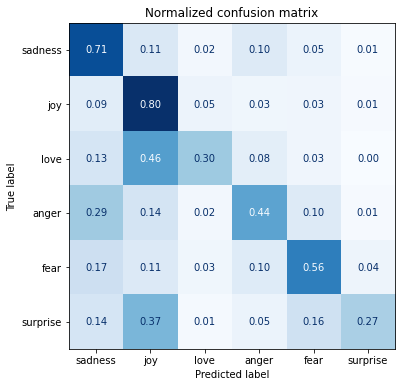

In [334]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()
    
y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

## 사전 훈련된 모델 로드하기

In [335]:
from transformers import AutoModelForSequenceClassification

num_labels = 6
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device))

In [336]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy":acc, "f1":f1}

In [337]:
from huggingface_hub import notebook_login
notebook_login()

In [338]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=ROOT/model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True, 
                                  save_strategy="epoch",
                                  load_best_model_at_end=True,
                                  log_level="error")

In [339]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args, 
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"],
                  eval_dataset=emotions_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train()

Cloning https://huggingface.co/gabrielyang/distilbert-base-uncased-finetuned-emotion into local empty directory.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.832600,0.318546,0.902000,0.898285
2,0.249900,0.220105,0.927500,0.927501


TrainOutput(global_step=500, training_loss=0.5412229843139649, metrics={'train_runtime': 249.7157, 'train_samples_per_second': 128.146, 'train_steps_per_second': 2.002, 'total_flos': 720342861696000.0, 'train_loss': 0.5412229843139649, 'epoch': 2.0})

In [340]:
preds_output = trainer.predict(emotions_encoded['validation'])
preds_output

PredictionOutput(predictions=array([[ 4.448224  , -0.5421714 , -0.95556104, -0.7031998 , -1.3263093 ,
        -1.7833843 ],
       [ 4.3368325 , -0.6607239 , -1.7321436 , -0.8183804 , -0.6608242 ,
        -1.5535629 ],
       [-1.1505464 ,  2.0866067 ,  2.6553707 , -1.2738903 , -1.7225661 ,
        -1.2434086 ],
       ...,
       [-1.2438401 ,  4.3892975 , -0.08157057, -1.6264218 , -1.5252111 ,
        -1.0602263 ],
       [-1.7092644 ,  2.657804  ,  2.2270076 , -1.4586372 , -1.7283901 ,
        -1.0463082 ],
       [-1.3919168 ,  4.1366    , -0.14957356, -1.652004  , -1.5556011 ,
        -0.56987625]], dtype=float32), label_ids=array([0, 0, 2, ..., 1, 1, 1]), metrics={'test_loss': 0.22010467946529388, 'test_accuracy': 0.9275, 'test_f1': 0.9275012469136824, 'test_runtime': 4.3622, 'test_samples_per_second': 458.486, 'test_steps_per_second': 7.336})

In [341]:
display(preds_output.metrics)
display(preds_output)


{'test_loss': 0.22010467946529388,
 'test_accuracy': 0.9275,
 'test_f1': 0.9275012469136824,
 'test_runtime': 4.3622,
 'test_samples_per_second': 458.486,
 'test_steps_per_second': 7.336}

PredictionOutput(predictions=array([[ 4.448224  , -0.5421714 , -0.95556104, -0.7031998 , -1.3263093 ,
        -1.7833843 ],
       [ 4.3368325 , -0.6607239 , -1.7321436 , -0.8183804 , -0.6608242 ,
        -1.5535629 ],
       [-1.1505464 ,  2.0866067 ,  2.6553707 , -1.2738903 , -1.7225661 ,
        -1.2434086 ],
       ...,
       [-1.2438401 ,  4.3892975 , -0.08157057, -1.6264218 , -1.5252111 ,
        -1.0602263 ],
       [-1.7092644 ,  2.657804  ,  2.2270076 , -1.4586372 , -1.7283901 ,
        -1.0463082 ],
       [-1.3919168 ,  4.1366    , -0.14957356, -1.652004  , -1.5556011 ,
        -0.56987625]], dtype=float32), label_ids=array([0, 0, 2, ..., 1, 1, 1]), metrics={'test_loss': 0.22010467946529388, 'test_accuracy': 0.9275, 'test_f1': 0.9275012469136824, 'test_runtime': 4.3622, 'test_samples_per_second': 458.486, 'test_steps_per_second': 7.336})

In [342]:
y_preds = np.argmax(preds_output.predictions, axis = 1)
y_preds

array([0, 0, 2, ..., 1, 1, 1])

In [343]:
display(preds_output.predictions.shape)
display(y_preds.shape)

(2000, 6)

(2000,)

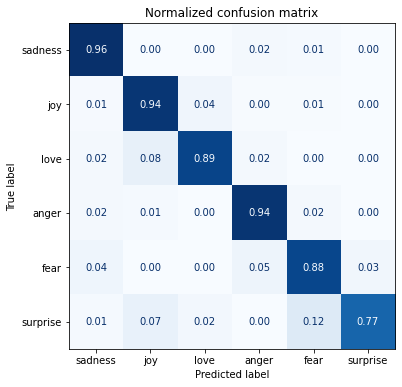

In [344]:
plot_confusion_matrix(y_preds, y_valid, labels)

In [345]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    # 모든 입력 텐서를 모델과 같은 장치로 이동합니다.
    inputs = {k:v.to(device) for k,v in batch.items() 
              if k in tokenizer.model_input_names}

    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch["label"].to(device), 
                             reduction="none")

    # 다른 데이터셋 열과 호환되도록 출력을 CPU로 옮깁니다.
    return {"loss": loss.cpu().numpy(), 
            "predicted_label": pred_label.cpu().numpy()}

In [346]:
# 데이터셋을 다시 파이토치 텐서로 변환합니다.
emotions_encoded.set_format("torch", 
                            columns=["input_ids", "attention_mask", "label"])
# 손실 값을 계산합니다.
emotions_encoded["validation"] = emotions_encoded["validation"].map(
    forward_pass_with_label, batched=True, batch_size=16)

  0%|          | 0/125 [00:00<?, ?ba/s]

In [347]:
emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"]
                              .apply(label_int2str))

In [348]:
df_sorted = df_test.sort_values("loss", ascending=False).head(10)
display(df_sorted.columns)
display(df_sorted.iloc[0]['text'])
display(f"label : {df_sorted.iloc[0]['label']}")
display(f"predicted : {df_sorted.iloc[0]['predicted_label']}")
display(f"loss : {df_sorted.iloc[0]['loss']}")

Index(['text', 'label', 'predicted_label', 'loss'], dtype='object')

'i feel badly about reneging on my commitment to bring donuts to the faithful at holy family catholic church in columbus ohio'

'label : love'

'predicted : sadness'

'loss : 5.659745216369629'

In [349]:
from huggingface_hub import login
login()

## 모델 저장 및 공유

In [350]:
!pip install git-lfs
!pip install huggingface_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
trainer

In [352]:
trainer.push_to_hub(
      commit_message='Training Completed')

Several commits (2) will be pushed upstream.
The progress bars may be unreliable.


KeyboardInterrupt: ignored

In [355]:
from transformers import pipeline

# `haesun`를 자신의 허브 사용자 이름으로 바꾸세요.
model_id = "distilbert-base-uncased-finetuned-emotion"
classifier = pipeline("text-classification", model=model_id)

In [358]:
custom_tweet = "I saw a movie today and it was really good."
preds = classifier(custom_tweet, return_all_scores=True)
preds

[[{'label': 'LABEL_0', 'score': 0.010434594936668873},
  {'label': 'LABEL_1', 'score': 0.9549815058708191},
  {'label': 'LABEL_2', 'score': 0.012639087624847889},
  {'label': 'LABEL_3', 'score': 0.00574359530583024},
  {'label': 'LABEL_4', 'score': 0.007135992404073477},
  {'label': 'LABEL_5', 'score': 0.009065313264727592}]]

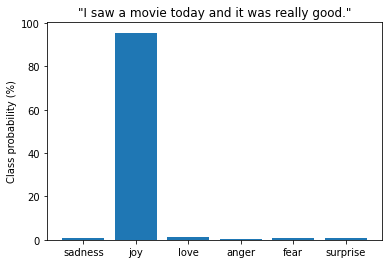

In [357]:
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()